In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [95]:
movies_revenue = pd.read_csv('weekend_boxoffice.csv')
movies_revenue['sales_prop'] = movies_revenue.sales.apply(lambda x: 
                                                          round(x / movies_revenue.sales.sum()
                                                                * 100, 2))
movies_revenue

,rank,title,sales,sales_prop
0,1,Joker (2019),96202337,67.41
1,2,Abominable,11921855,8.35
2,3,Downton Abbey,7989920,5.60
3,4,Hustlers,6393824,4.48
4,5,It: Chapter Two,5317529,3.73
5,6,Judy,4598798,3.22
6,7,Ad Astra,4191582,2.94
7,8,Rambo: Last Blood,3599858,2.52
8,9,War (2019),1607627,1.13
9,10,Good Boys,890095,0.62


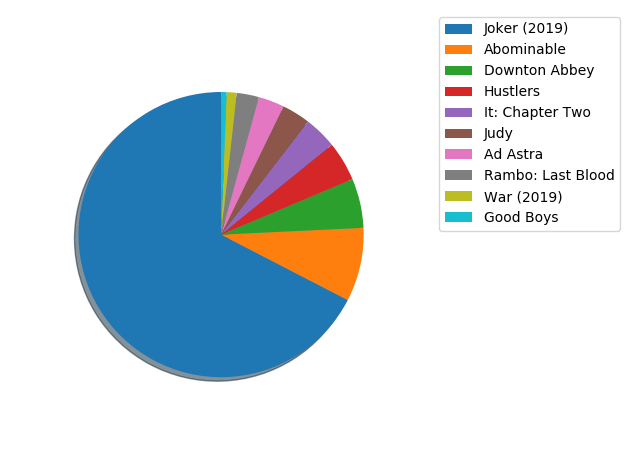

In [121]:
titles = movies_revenue['title'].tolist()
sales_prop = movies_revenue['sales_prop'].tolist()
sales = movies_revenue['sales'].tolist()
patches, texts = plt.pie(sales_prop, shadow=True, startangle=90)
plt.legend(patches, titles, loc="best", bbox_to_anchor=(1,1))
plt.axis('equal')
plt.tight_layout()
plt.show();

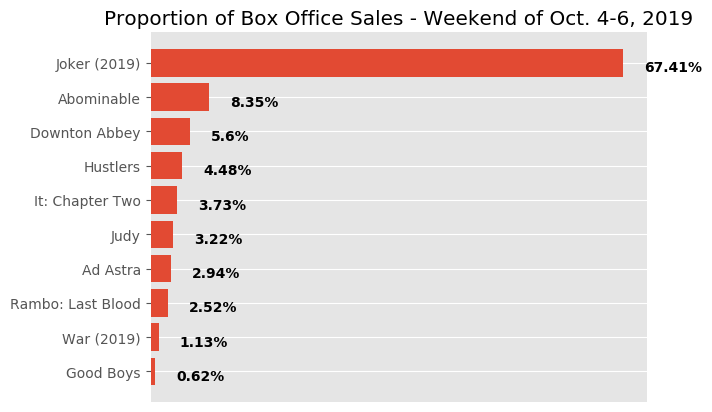

In [127]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

fig.patch.set_visible(False)

y_pos = np.arange(len(titles))
ax.barh(y_pos, sales_prop, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(titles)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Proportion of Box Office Sales - Weekend of Oct. 4-6, 2019')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

for i, v in enumerate(sales_prop):
    ax.text(v + 3, i + .25, (str(v) + "%"), color='black', fontweight='bold')
    
plt.show();

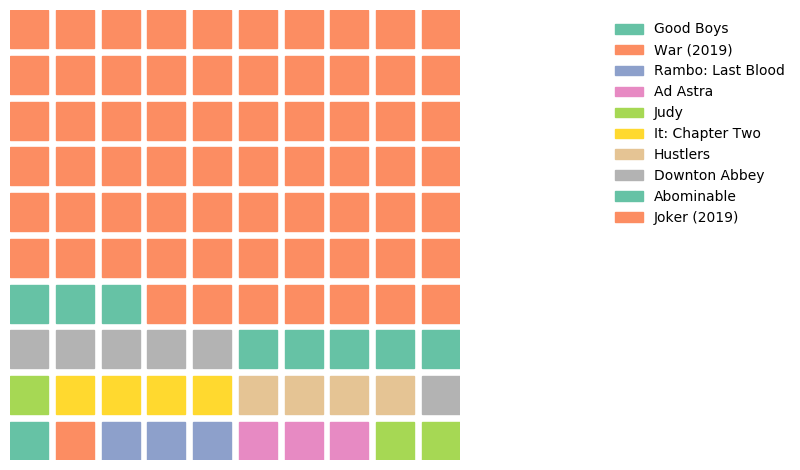

In [104]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows = 10,
    columns=10,
    values= {title: sale for title, sale in zip(list(reversed(titles)), list(reversed(sales_prop)))},
    legend={'loc': 'upper right', 'bbox_to_anchor': (1.75, 1), 'framealpha': 0},
    vertical=True
)
plt.show();